In [1]:
# Perform the standard numpy and units imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
# Set plot default figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import xray
import morticia.sensor.electro as electro
# This notebook is also used for development/testing of the electro module, so auto reload the electro module if it changes
%load_ext autoreload
%aimport morticia.sensor.electro
%autoreload 1

In [54]:
# Show a conversion of absolute spectral response to spectral quantum efficiency
asr = xray.DataArray([0.1, 0.3, 0.25, 0.1], [('wvl', [0.5, 0.6, 0.7, 0.8], {'units': 'um'})], 
                     attrs={'units': 'A/W'},
                     name='asr')

In [55]:
# Here is how the xray.DataArray is printed
# Note that you only see the units of the primary (absolute spectral response) data and 
# not the units of the wavelength axis
print asr

<xray.DataArray 'asr' (wvl: 4)>
array([ 0.1 ,  0.3 ,  0.25,  0.1 ])
Coordinates:
  * wvl      (wvl) float64 0.5 0.6 0.7 0.8
Attributes:
    units: A/W


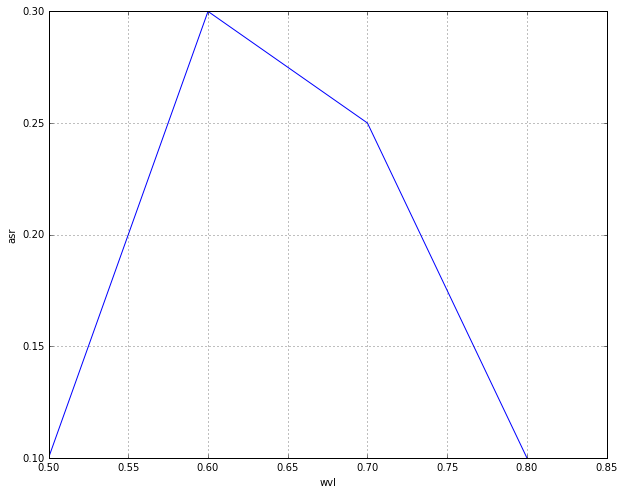

In [56]:
# Easy to plot (but axis names and units are not very illuminating)
asr.plot()
plt.grid()

In [57]:
# Unit attribute can be fetched like this (but NOT set - setting requires e.g. asr.attrs['units'] = 'km')
print asr.units,'  and  ', asr['wvl'].units


A/W   and   um


In [58]:
# Convert to spectral quantum efficiency (SQE)
sqe = electro.xd_asr2sqe(asr)

In [59]:
# Print out the DataArray 
print sqe
print '---------------------------------'
print sqe['wvl']

<xray.DataArray (wvl: 4)>
array([ 0.24796838,  0.61992095,  0.44280068,  0.15498024])
Coordinates:
  * wvl      (wvl) float64 500.0 600.0 700.0 800.0
Attributes:
    units: 
    long_name: Spectral Quantum Efficiency
---------------------------------
<xray.DataArray 'wvl' (wvl: 4)>
array([ 500.,  600.,  700.,  800.])
Coordinates:
  * wvl      (wvl) float64 500.0 600.0 700.0 800.0
Attributes:
    units: nm
    long_name: Wavelength


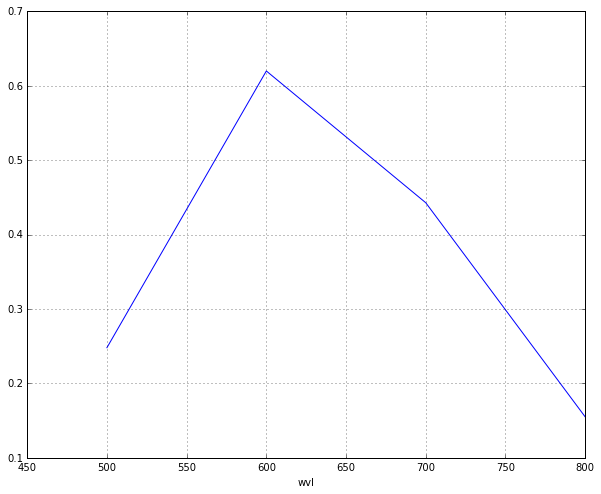

In [60]:
# Plot the spectral quantum efficiency
sqe.plot()
plt.grid()

In [61]:
# Read ASR data for the Hamamatsu S2281-04 detector
HamaS2281asrData = np.genfromtxt('data/fpa/HamamatsuS2281-04asr.csv', delimiter=',')


In [62]:
# Create a DataArray using the data read from the file
HamaS2281asr = xray.DataArray(HamaS2281asrData[:,1], [('wvl', HamaS2281asrData[:,0], {'units': 'nm'})],
                             name='asr',
                             attrs={'units': 'A/W'})

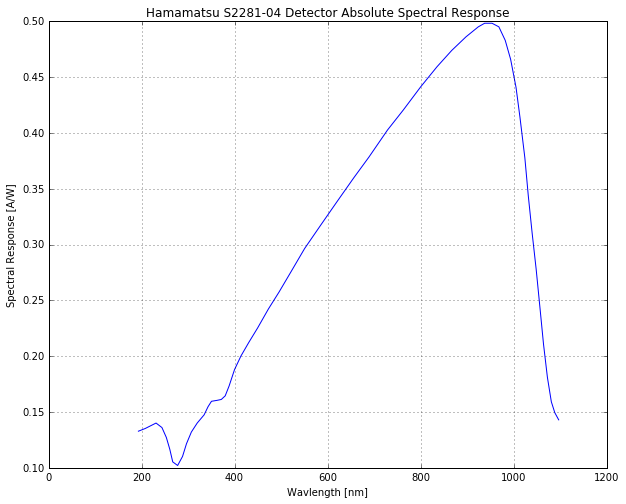

In [63]:
# Plot absolute spectral response of the Hamamatsu S2281-04 Detector
HamaS2281asr.plot()
plt.title('Hamamatsu S2281-04 Detector Absolute Spectral Response')
plt.xlabel('Wavlength [' + HamaS2281asr['wvl'].units + ']')
plt.ylabel('Spectral Response [' + HamaS2281asr.units + ']')
plt.grid()

In [64]:
# Convert to quantum efficiency
HamaS2281sqe = electro.xd_asr2sqe(HamaS2281asr)

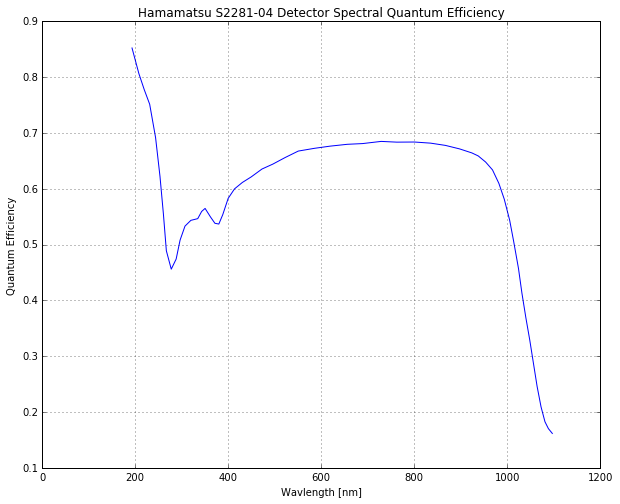

In [65]:
# PLot SQE
HamaS2281sqe.plot()
plt.title('Hamamatsu S2281-04 Detector Spectral Quantum Efficiency')
plt.xlabel('Wavlength [' + HamaS2281sqe['wvl'].units + ']')
plt.ylabel('Quantum Efficiency')
plt.grid()

In [66]:
# Show the xray.DataArray
HamaS2281sqe

<xray.DataArray (wvl: 56)>
array([ 0.8523597 ,  0.80635996,  0.77749808,  0.75153361,  0.69196015,
        0.62245062,  0.5547703 ,  0.48899451,  0.45596669,  0.47414431,
        0.5080692 ,  0.53314151,  0.54346119,  0.54651026,  0.55942642,
        0.56484432,  0.54953138,  0.53820564,  0.53683613,  0.55362499,
        0.58277065,  0.59988157,  0.61137199,  0.62131291,  0.63544646,
        0.64420807,  0.65592819,  0.66761703,  0.67254831,  0.6764569 ,
        0.67974561,  0.68103169,  0.68493868,  0.68361506,  0.68382671,
        0.68180083,  0.6777847 ,  0.67148756,  0.66429565,  0.65887436,
        0.64795379,  0.63393629,  0.60976066,  0.58143207,  0.54377081,
        0.50656866,  0.45725236,  0.41311306,  0.36922686,  0.32891938,
        0.28450631,  0.24575089,  0.20919764,  0.18250005,  0.17019992,
        0.16157465])
Coordinates:
  * wvl      (wvl) float64 193.2 207.9 219.5 231.1 243.8 253.3 260.7 267.0 ...
Attributes:
    units: 
    long_name: Spectral Quantum Efficiency

In [67]:
# Convert the SQE and ASR to individual xray.Dataset objects
HamaS2281asrDataset = HamaS2281asr.to_dataset(name='Hamamatsu S2281-04 ASR')
HamaS2281asrDataset.attrs['title'] = 'Hamamatsu S2281-04 Detector Absolute Spectral Response'
HamaS2281sqeDataset = HamaS2281sqe.to_dataset(name='Hamamatsu S2281-04 SQE')
HamaS2281sqeDataset.attrs['title'] = 'Hamamatsu S2281-04 Detector Spectral Quantum Efficiency'

In [68]:
# Write the data in netCDF format
HamaS2281asrDataset.to_netcdf('data/fpa/HamamatsuS2281-04asr.nc')
HamaS2281sqeDataset.to_netcdf('data/fpa/HamamatsuS2281-04sqe.nc')

In [69]:
# Convert back to ASR to check
HamaS2281asrBack = electro.xd_sqe2asr(HamaS2281sqe)

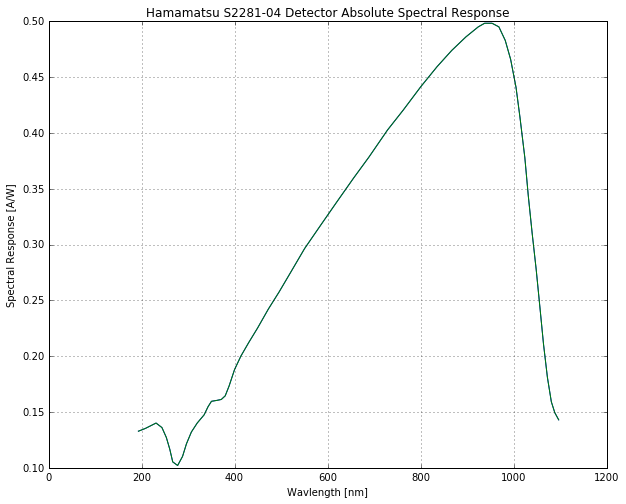

In [70]:
# Plot old and new on top of each other
plt.figure()
plt.plot(HamaS2281asrBack['wvl'], HamaS2281asrBack, HamaS2281asr['wvl'], HamaS2281asr)
plt.title('Hamamatsu S2281-04 Detector Absolute Spectral Response')
plt.xlabel('Wavlength [' + HamaS2281asr['wvl'].units + ']')
plt.ylabel('Spectral Response [' + HamaS2281asr.units + ']')
plt.grid()

# Focal Plane Arrays

Here is an example of creating a electro.FocalPlaneArray object.
Use the Kodak KAI11002 as an example

In [75]:
# Create a CCD Focal Plane Array model for the Kodak KAI11002 sensor
# First read the spectral quantum efficiency data
KodakKA11002_SQE = np.genfromtxt('./data/fpa/KodakKAI11002_SQE.csv', delimiter=',', skip_header=1)
# Convert to a DataArray
KodakKA11002_SQE = xray.DataArray(KodakKA11002_SQE[:,1], [('wvl', KodakKA11002_SQE[:,0], {'units': 'um'})], 
                                  name='sqe', attrs={'units':''})

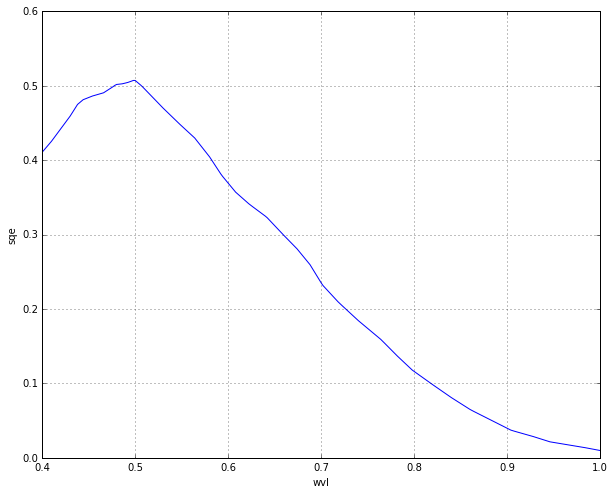

In [78]:
# Plot the SQE
KodakKA11002_SQE.plot()
plt.grid()

In [96]:
# Instantiate the FocalPlaneArray object
CCD = electro.FocalPlaneArray(pitch=[9.0, 'um'], aperture=[9.0, 'um'], pixels=[4008, 2672], wellcapacity=[60000.0, 'e'], 
                              readnoise=[32.0, 'e'], darkcurrent=[3846.0, 'e/s'], dsnu=[3.0, '%'], prnu=[2.0, '%'],
                              sqe=KodakKA11002_SQE, darkcurrent_delta_t=[7.0, 'delta_degC'], t_ref=[40.0, 'degC'],
                              temperature=[25.0, 'degC'])

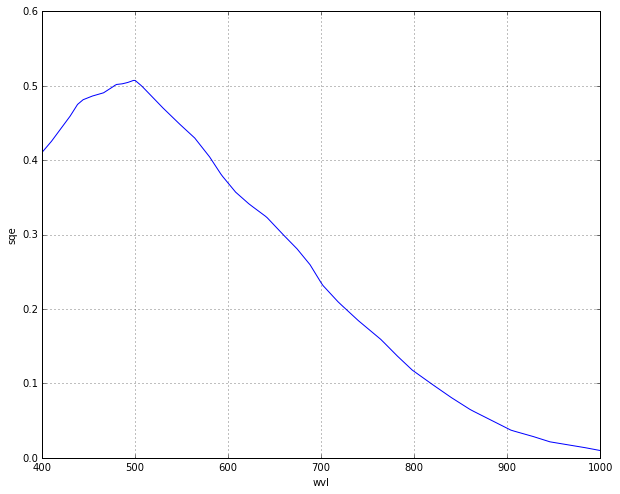

In [92]:
# Notice that wavelength units are converted to nm, the preferred unit in MORTICIA
CCD.sqe.plot()
plt.grid()